In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from xgboost import XGBRegressor

XGBoostError: 
XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed
    - vcomp140.dll or libgomp-1.dll for Windows
    - libomp.dylib for Mac OSX
    - libgomp.so for Linux and other UNIX-like OSes
    Mac OSX users: Run `brew install libomp` to install OpenMP runtime.

  * You are running 32-bit Python on a 64-bit OS

Error message(s): ["dlopen(/Users/lukasmetz/opt/anaconda3/lib/python3.8/site-packages/xgboost/lib/libxgboost.dylib, 0x0006): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib\n  Referenced from: /Users/lukasmetz/opt/anaconda3/lib/python3.8/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: tried: '/usr/local/opt/libomp/lib/libomp.dylib' (no such file), '/usr/local/lib/libomp.dylib' (no such file), '/usr/lib/libomp.dylib' (no such file)"]


# Load mpg dataset and prepare for regression

In [2]:
df = sns.load_dataset('mpg')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [3]:
df = df.dropna()

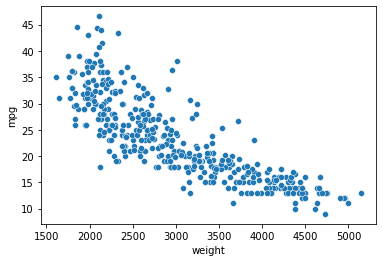

In [4]:
sns.scatterplot(data=df, x='weight', y='mpg')
plt.show()

In [5]:
def get_metrics(X, y, model):
    y_pred = model.predict(X)
    print('R^2: {}'.format(model.score(X, y)))
    print('MSE: {}'.format(mean_squared_error(y, y_pred)))
    print('MAE: {}'.format(mean_absolute_error(y, y_pred)))

# Decision Tree Regressor

In [6]:
X = df['weight'].values.reshape(-1, 1)
y = df['mpg'].values.reshape(-1, 1)

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=10)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Score
get_metrics(X, y, regr_1)
get_metrics(X, y, regr_2)

#Entscheidungsbaum mit Tiefe von 10 besser

R^2: 0.7096817768665133
MSE: 17.6405302572979
MAE: 3.099805582752566
R^2: 0.9381675919610309
MSE: 3.7571064369304166
MAE: 1.13633764619734


In [9]:
X

array([[3504],
       [3693],
       [3436],
       [3433],
       [3449],
       [4341],
       [4354],
       [4312],
       [4425],
       [3850],
       [3563],
       [3609],
       [3761],
       [3086],
       [2372],
       [2833],
       [2774],
       [2587],
       [2130],
       [1835],
       [2672],
       [2430],
       [2375],
       [2234],
       [2648],
       [4615],
       [4376],
       [4382],
       [4732],
       [2130],
       [2264],
       [2228],
       [2634],
       [3439],
       [3329],
       [3302],
       [3288],
       [4209],
       [4464],
       [4154],
       [4096],
       [4955],
       [4746],
       [5140],
       [2962],
       [2408],
       [3282],
       [3139],
       [2220],
       [2123],
       [2074],
       [2065],
       [1773],
       [1613],
       [1834],
       [1955],
       [2278],
       [2126],
       [2254],
       [2408],
       [2226],
       [4274],
       [4385],
       [4135],
       [4129],
       [3672],
       [46

In [15]:
print(X.min())
print(X.max())

1613
5140


In [12]:
np.arange(min(X)-100, max(X), 0.01)

array([1513.  , 1513.01, 1513.02, ..., 5139.97, 5139.98, 5139.99])

In [13]:
np.arange(min(X)-100, max(X), 0.01)[:, np.newaxis]

array([[1513.  ],
       [1513.01],
       [1513.02],
       ...,
       [5139.97],
       [5139.98],
       [5139.99]])

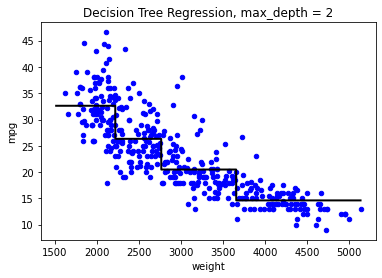

In [17]:
# Plot result
X_test = np.arange(min(X)-100, max(X), 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)
plt.scatter(X, y, s=20, c="b")
plt.plot(X_test, y_1, color="k", linewidth=2)
plt.xlabel("weight")
plt.ylabel("mpg")
plt.title("Decision Tree Regression, max_depth = 2")
plt.show()

# können nur bei weight splitten 
# -> 4 Plateaus binary splitting max depth 2
# benutzen Mittelwert

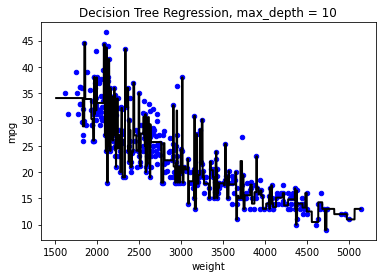

In [8]:
plt.scatter(X, y, s=20, c="b")
plt.plot(X_test, y_2, color="k", linewidth=2)
plt.xlabel("weight")
plt.ylabel("mpg")
plt.title("Decision Tree Regression, max_depth = 10")
plt.show()
# binary splitting Tiefe von 10
# 2^10

# Random Forest Regressor

In [9]:
X = df['weight'].values.reshape(-1, 1)
y = df['mpg'].values.reshape(-1, 1)

param_grid = [
    {'max_depth': range(2, 10, 2),
     'n_estimators': [100, 200, 500]}
]

regr = RandomForestRegressor()
search = GridSearchCV(regr, param_grid, cv=10)
search.fit(X, y.ravel())
print("Best parameter (CV score={:.2f}):{})".format(search.best_score_, search.best_params_))

#bekomme 100 Werte raus -> bilde Mittelwert 

# Score 
get_metrics(X, y, search)

Best parameter (CV score=0.40):{'max_depth': 2, 'n_estimators': 500})
R^2: 0.7311809112380055
MSE: 16.334183978746722
MAE: 2.9632466681045746


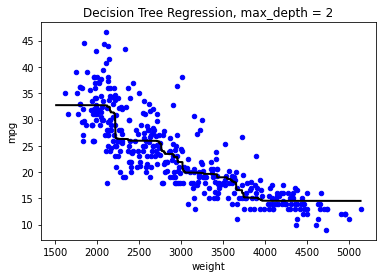

In [10]:
# Plot result
regr = RandomForestRegressor(max_depth=2, n_estimators=500)
regr.fit(X, y.ravel())
X_test = np.arange(min(X)-100, max(X), 0.01)[:, np.newaxis]
y_1 = regr.predict(X_test)
plt.scatter(X, y, s=20, c="b")
plt.plot(X_test, y_1, color="k", linewidth=2)
plt.xlabel("weight")
plt.ylabel("mpg")
plt.title("Decision Tree Regression, max_depth = 2")
plt.show()

# haben nun Mittelwerte von Plateaus -> kommt gut der Kurve nach 

# XGBoost Regressor

In [11]:
X = df['weight'].values.reshape(-1, 1)
y = df['mpg'].values.reshape(-1, 1)

param_grid = [
    {'max_depth': [1, 2, 3, 4],
     'n_estimators': [100, 200]}
]

regr = XGBRegressor()
search = GridSearchCV(regr, param_grid, cv=10)
search.fit(X, y.ravel())
print("Best parameter (CV score={:.2f}):{})".format(search.best_score_, search.best_params_))

# Score 
get_metrics(X, y, search)

Best parameter (CV score=0.41):{'max_depth': 1, 'n_estimators': 100})
R^2: 0.7526445475865019
MSE: 15.029994657282057
MAE: 2.8135444096156528


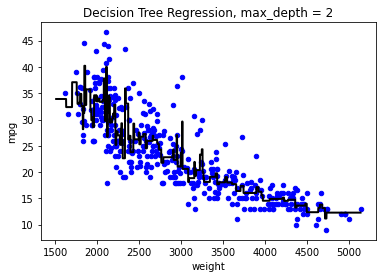

In [12]:
# Plot result
regr = XGBRegressor(max_depth=2, n_estimators=100)
regr.fit(X, y.ravel())
X_test = np.arange(min(X)-100, max(X), 0.01)[:, np.newaxis]
y_1 = regr.predict(X_test)
plt.scatter(X, y, s=20, c="b")
plt.plot(X_test, y_1, color="k", linewidth=2)
plt.xlabel("weight")
plt.ylabel("mpg")
plt.title("Decision Tree Regression, max_depth = 2")
plt.show()

# ARIMA Model

In [13]:
from statsmodels.tsa.arima.model import ARIMA

# load dataset
series = pd.read_csv('shampoo_sales.csv', parse_dates=[0], infer_datetime_format=True).set_index('Month')
series.index = series.index.to_period('M')
series.head()

,Sales
Month,
2001-01,266.0
2001-02,145.9
2001-03,183.1
2001-04,119.3
2001-05,180.3


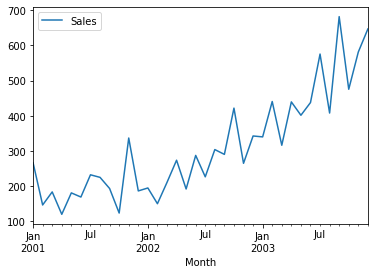

In [14]:
series.plot()
plt.show()

In [15]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(series.values)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
# hier müsste nun eigentlich differenziert werden und der adfuller Test auf der differenzierten Zeitreihe nochmals ausgeführt werden!

ADF Statistic: 3.060142
p-value: 1.000000


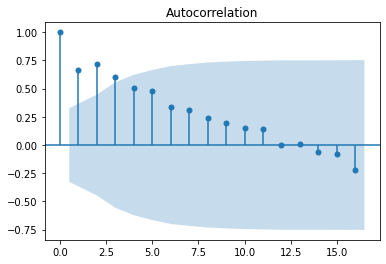

In [16]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(series)
plt.show()

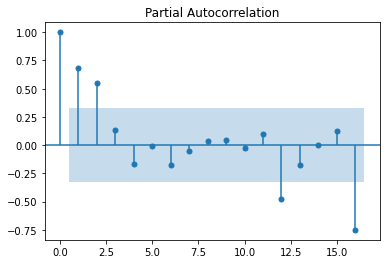

In [17]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(series)
plt.show()

In [21]:
# fit model
model = ARIMA(series, order=(2,1,3))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(2, 1, 3)   Log Likelihood                -196.448
Date:                Fri, 17 Dec 2021   AIC                            404.896
Time:                        10:39:15   BIC                            414.228
Sample:                    01-31-2001   HQIC                           408.118
                         - 12-31-2003                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2643      0.818     -0.323      0.747      -1.867       1.339
ar.L2          0.2517      0.294      0.855      0.393      -0.325       0.829
ma.L1         -0.9679      4.798     -0.202      0.8

c:\users\maxih\anaconda3\envs\python_env\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=358.914927, expected=342.300000
predicted=307.528541, expected=339.700000
predicted=365.788197, expected=440.400000
predicted=362.017275, expected=315.900000
predicted=423.407802, expected=439.300000
predicted=375.000820, expected=401.300000
predicted=455.359393, expected=437.400000
predicted=421.618886, expected=575.500000


c:\users\maxih\anaconda3\envs\python_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\users\maxih\anaconda3\envs\python_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


predicted=453.364237, expected=407.600000


c:\users\maxih\anaconda3\envs\python_env\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=536.500191, expected=682.000000


c:\users\maxih\anaconda3\envs\python_env\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=512.777691, expected=475.300000


c:\users\maxih\anaconda3\envs\python_env\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=670.697424, expected=581.300000
Test RMSE: 74.50501388956675


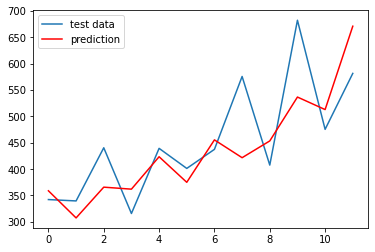

In [22]:
from math import sqrt
# split into train and test sets
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:-1]
history = [x for x in train]
predictions = list()
# rolling forecast
for t in range(len(test)):
    model = ARIMA(history, order=(2,1,3))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: {}'.format(rmse))
# plot forecasts against actual outcomes
plt.plot(test, label='test data')
plt.plot(predictions, color='red', label='prediction')
plt.legend()
plt.show()